# Importing libraries

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
import glob
from sklearn.decomposition import PCA
import seaborn

# Defining main class for all analysis

In [43]:
class SpongeSVD:
    def __init__(self):
        '''
        This method initializes and loads all of the csv data from the data folder. 
        Input: none
        Output: none

        This method stores all of the necessary information as internal attributes of this class
        '''
        allData={}
        # matrix=[]
        for fileID in glob.glob( '*/**.csv' ):
            name=fileID.split('/')[1].split('.')[0]
            # the line below imports all of the data and coverts it directly into 0's and 1's
            allData[name]=pd.read_csv(fileID, header=None).apply(lambda x: [y if y == 0 else 1 for y in x])
        
        self.allData=allData
    
    def ConvertDataToMatrix(self,randomSample=False,randomSeed=1):
        '''
        This method converts all data to the corresponding matrix format for SVD
        Input: none (optional: sample randomly and seed for random sampling)
        Output: none

        This stores internally the information needed for the SVD
        '''
        allData=self.allData

        if randomSample==False:
            matrix=[]
            for name in allData:
                matrix.append(allData[name].values.flatten())
            self.matrix=np.array(matrix)

        else:
            np.random.seed(randomSeed)

            matrix=[]
            allDataKeys=list(allData.keys())

            for name in np.random.choice(allDataKeys,len(allDataKeys)-1,replace=False):
                matrix.append(allData[name].values.flatten())
            self.matrix=np.array(matrix)


    def PlotOriginalMatrix(self,name):
        '''
        This method is a plotter fucntion for vizializing stored matrices
        Input: name of the matrix you would like to plot
        Output: none

        This method plots the matrix
        '''
        plt.figure()
        Matrix=self.allData[name]
        plt.imshow(Matrix,origin='lower',cmap='binary')
        ax = plt.gca()
        ax = plt.gca()

        # # Major ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Minor ticks
        ax.set_xticks(np.arange(-.51, Matrix.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-.51, Matrix.shape[0], 1), minor=True)

        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 


        # Gridlines based on minor ticks
        ax.grid(which='minor', color='black')
    
    def GetAllNames(self):
        '''
        This provides all of the names of the stored variables in the matrix
        Input: none
        Output: keys of the names
        '''
        return self.allData.keys()
    
    def DeleteDesign(self,name):
        '''
        This method helps delete desings not to be inlcuded in the analysis.
        Input: name of design in string or list format
        Output: none
        
        This deletes a design from the class
        '''
        if type(name)==str:
            del self.allData[name]
        else:
            for i in name:
                del self.allData[i]

    def FitPCA(self,n):
        '''
        This method utilizes the built in decomposition function from Scikit-learn to perform the decomposition of the data
        Input: number of components
        Output: none
        '''
        myPCA = PCA(n_components=n)
        myPCA.fit(self.matrix)
        self.myPCA=myPCA
    
    def transformPCA(self):
        '''
        This methods transforms the data based on the learned PCA
        Input: none
        Output: transformation
        '''
        myPCA=self.myPCA
        return myPCA.transform(self.matrix)
    
    def EigenVectors(self):
        '''
        Obtains the eigenvectos of full data matrix
        Input: none
        Ouput: eigenvectors

        THIS STILL NEEDS WORK
        '''
        matrix=self.matrix
        w,v=np.linalg.eig(matrix)

    def SVD(self):
        '''
        Obtains the SVD for the matrix
        Input: none
        Output: none
        
        This method stores the data in the class object
        '''
        matrix=self.matrix
        _, eig, vh = np.linalg.svd(matrix)
        self.eig=eig
        self.newMatrix=vh

    def PlotNewMatrix(self,num,BW=False,inversecol=False, coef=1):
        '''
        Plots the new generated matrix
        Input: the number of the matrix, BW if necessary to convert it to BW
        Output: none
        '''
        plt.figure()
        Matrix=self.newMatrix[num,:]
        if BW==True:
            mean=coef*np.mean(Matrix)
            func1 = lambda x: [0 if y < mean else 1 for y in x]
            Matrix=np.array(func1(Matrix))

        if inversecol == True:
            func2 = lambda x: [0 if y > 0.5 else 1 for y in x]
            Matrix=np.array(func2(Matrix))

        
        Matrix=Matrix.reshape((32,32))

        plt.imshow(Matrix,origin='lower',cmap='binary')
        ax = plt.gca()
        ax = plt.gca()

        # # Major ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Minor ticks
        ax.set_xticks(np.arange(-.51, Matrix.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-.51, Matrix.shape[0], 1), minor=True)

        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 


        # Gridlines based on minor ticks
        ax.grid(which='minor', color='black')
my=SpongeSVD()
my.DeleteDesign(['Cyl','Uni','Bi'])

# Original 10 Matrices Ploted
Removed the uni and bidriectionals from database

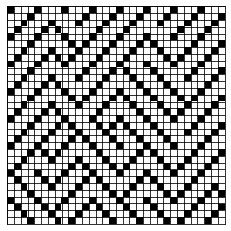

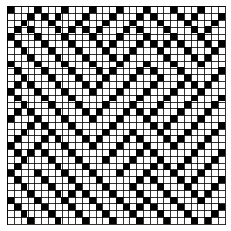

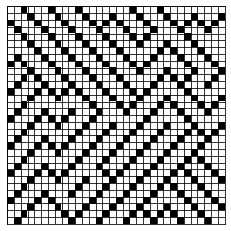

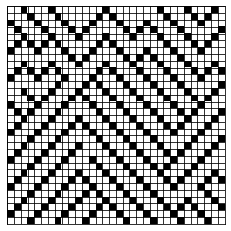

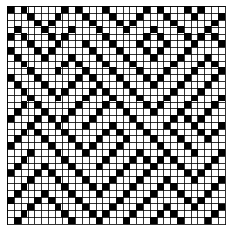

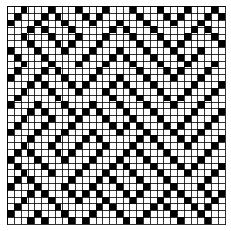

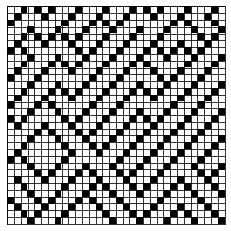

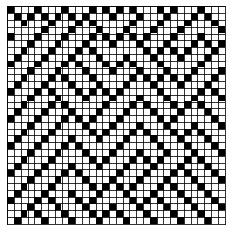

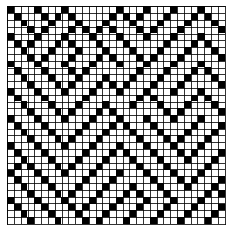

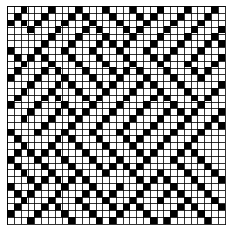

In [31]:
for name in my.GetAllNames():
    my.PlotOriginalMatrix(name)

# New Matrices Generated using the SVD
Options and descriptions can be seen below

The governing equation for the SVD is 

$$\displaystyle \mathbf {M} =\mathbf {U\Sigma V^{*}}$$,

where we seek to find $$\mathbf V^*$$. 
[More in this reference](https://en.wikipedia.org/wiki/Singular_value_decomposition)

## Original Ordering in Main Matrix

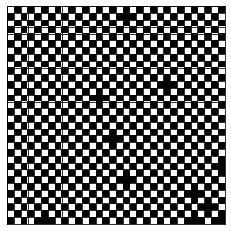

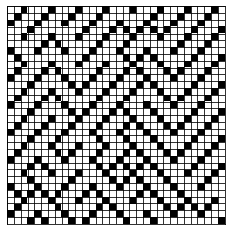

In [44]:
#change the number to get another svd vector
#change the BW option to make it either Black and White or grayscale (BW=True is balck and white; BW=False is grayscale) 
my.ConvertDataToMatrix()
my.SVD()
my.PlotNewMatrix(0,BW=True)
my.PlotNewMatrix(1,BW=True)
# my.PlotNewMatrix(2,BW=True)
# my.PlotNewMatrix(3,BW=True,inversecol=True)
# my.PlotNewMatrix(4,BW=True,inversecol=True,coef=0.1)
# my.PlotNewMatrix(5,BW=True,inversecol=True,coef=0.001)
# my.PlotNewMatrix(5,BW=True,inversecol=True,coef=0)

## Plotting 'Eigenvalues'

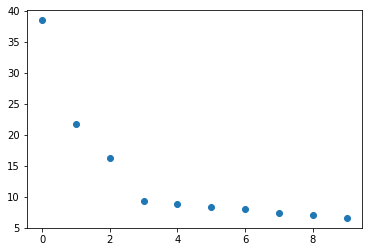

In [47]:
plt.plot(my.eig,'o')

## Random Ordering in Main Matrix removing one design -- seed 10

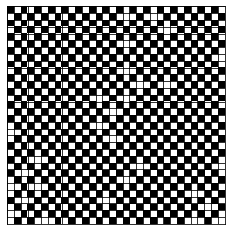

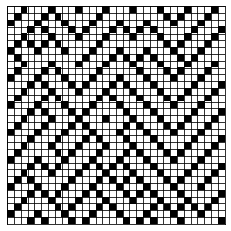

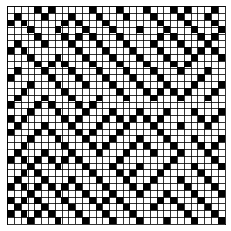

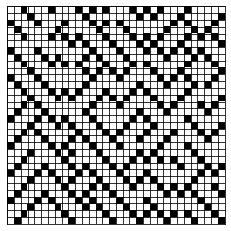

In [48]:
#change the number to get another svd vector
#change the BW option to make it either Black and White or grayscale (BW=True is balck and white; BW=False is grayscale) 
my.ConvertDataToMatrix(randomSample=True,randomSeed=10)
my.SVD()
my.PlotNewMatrix(0,BW=True,inversecol=True)
my.PlotNewMatrix(1,BW=True,inversecol=True)
my.PlotNewMatrix(2,BW=True,inversecol=True)
my.PlotNewMatrix(3,BW=True,inversecol=True)

## Random Ordering in Main Matrix removing one design -- seed 100

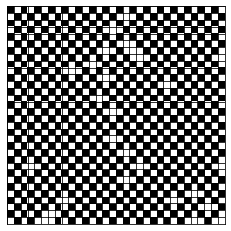

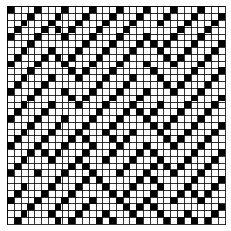

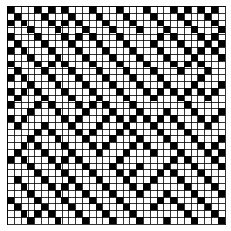

In [57]:
my.ConvertDataToMatrix(randomSample=True,randomSeed=100)
my.SVD()
my.PlotNewMatrix(0,BW=True,inversecol=True)
my.PlotNewMatrix(1,BW=True,inversecol=False)
my.PlotNewMatrix(2,BW=True,inversecol=False)
my.PlotNewMatrix(3,BW=True,inversecol=False)

## Random Ordering in Main Matrix removing one design -- seed 1000

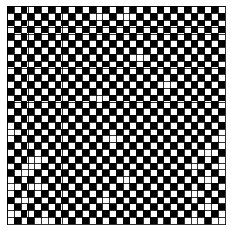

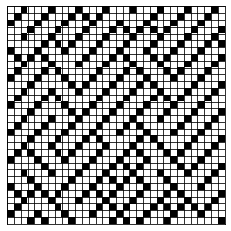

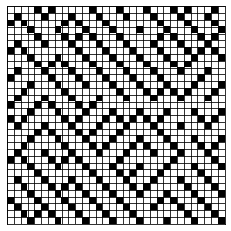

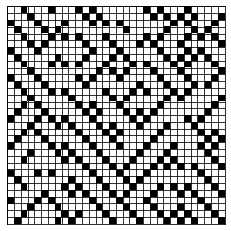

In [54]:
my.ConvertDataToMatrix(randomSample=True,randomSeed=1000)
my.SVD()
my.PlotNewMatrix(0,BW=True,inversecol=True)
my.PlotNewMatrix(1,BW=True,inversecol=True)
my.PlotNewMatrix(2,BW=True,inversecol=False)
my.PlotNewMatrix(3,BW=True,inversecol=False)